### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [35]:
data = pd.read_csv('Data.csv')
item = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [37]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


In [38]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [39]:
data.shape

(100000, 4)

In [40]:
item.shape

(1681, 22)

In [41]:
user.shape

(943, 5)

In [42]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [43]:
item.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


In [44]:
user.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [45]:
data.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [46]:
item.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [47]:
user.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [48]:
item.iloc[:,3:].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [49]:
#hint: use sum on the axis = 1
item[item.iloc[:,3:].sum(axis=1) >1].iloc[:,:2]

,movie id,movie title
0,1,Toy Story
1,2,GoldenEye
3,4,Get Shorty
4,5,Copycat
6,7,Twelve Monkeys
...,...,...
1667,1669,MURDER and murder
1668,1670,Tainted
1671,1673,Mirage
1677,1679,B. Monkey


In [50]:
item[item.iloc[:,3:].sum(axis=1) >1].iloc[:,:2]

,movie id,movie title
0,1,Toy Story
1,2,GoldenEye
3,4,Get Shorty
4,5,Copycat
6,7,Twelve Monkeys
...,...,...
1667,1669,MURDER and murder
1668,1670,Tainted
1671,1673,Mirage
1677,1679,B. Monkey


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [51]:
item = item[~(item.unknown == 1)]
item.shape

(1680, 22)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [52]:
# HINT: use distplot for age, release date and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below

In [53]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [54]:
#your answers here
item['year'] = item['release date'].str.split('-').str[-1]

In [55]:
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


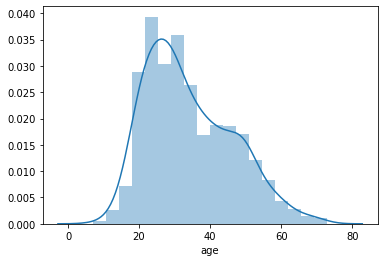

In [56]:
sns.distplot(user.age);

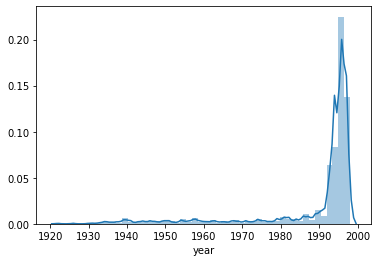

In [57]:
sns.distplot(item.year.astype('int64'));

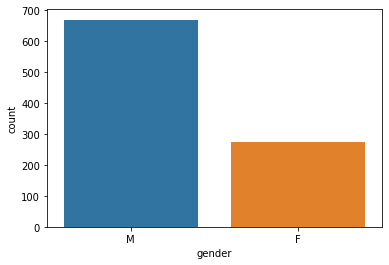

In [58]:
sns.countplot(user.gender);

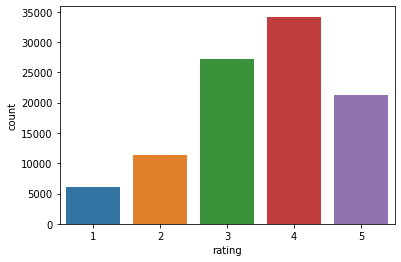

In [59]:
sns.countplot(data.rating);

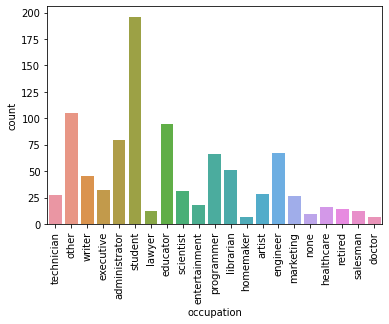

In [60]:
sns.countplot(user.occupation);
plt.xticks(rotation=90);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

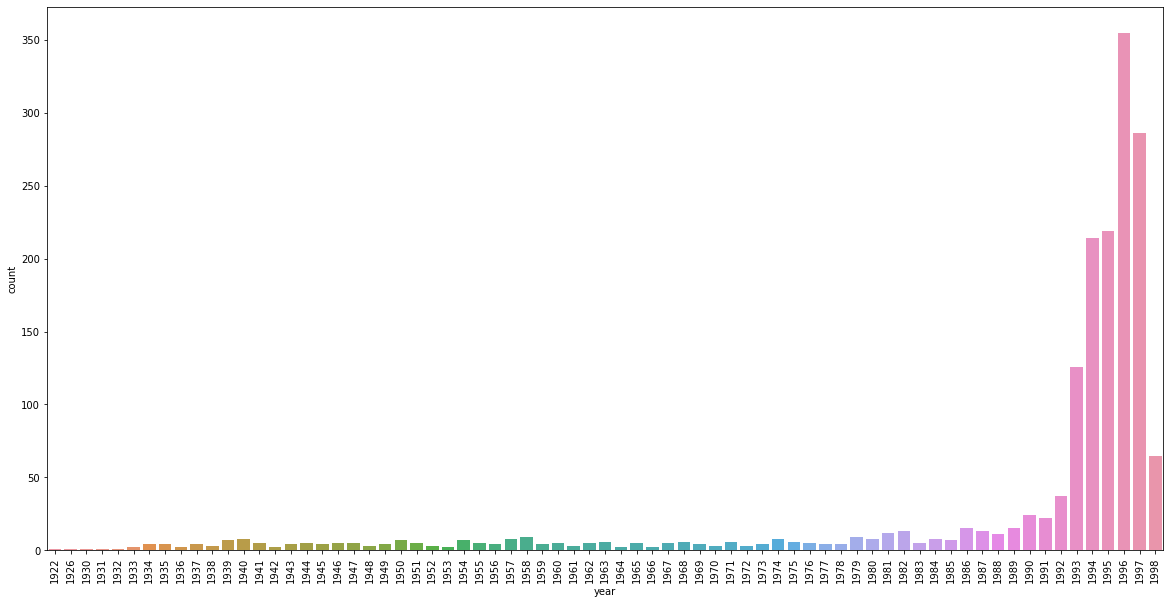

In [61]:
## This is for overall trend over the years
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='year',data=item);
xlabels = ax.get_xticklabels();
ax.set_xticklabels(xlabels, rotation=90);

In [62]:
genreCols = item.columns.to_list()[3:]
genreGroupByYears = item.groupby('year')[genreCols].sum()
genreGroupByYears

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


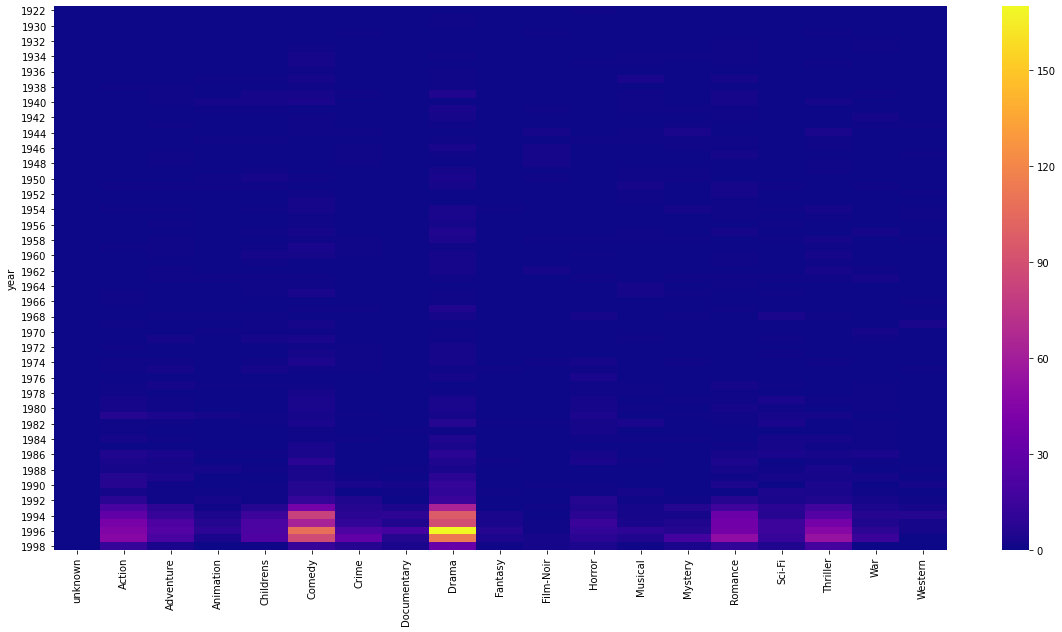

In [63]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(genreGroupByYears,cmap='plasma');

In [64]:
## Adding Decade column for better data visualizatoin as there are many years and it would be helpful to visualize by decade as well
item['decade'] = item.year.apply(lambda x: str(10*(int(x)//10))+'s' )
item.sample(n=10)


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,decade
1198,1200,Kim,01-Jan-1950,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1950,1950s
670,672,Candyman,01-Jan-1992,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1992,1990s
500,502,Bananas,01-Jan-1971,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1971,1970s
1105,1107,Beyond Rangoon,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1995,1990s
583,585,Son in Law,01-Jan-1993,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1993,1990s
704,706,Bad Moon,01-Nov-1996,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1996,1990s
1499,1501,Prisoner of the Mountains (Kavkazsky Plennik),31-Jan-1997,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1997,1990s
709,711,"Substance of Fire, The",06-Dec-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1996,1990s
38,39,Strange Days,01-Jan-1995,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1995,1990s
757,759,Fair Game,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1995,1990s


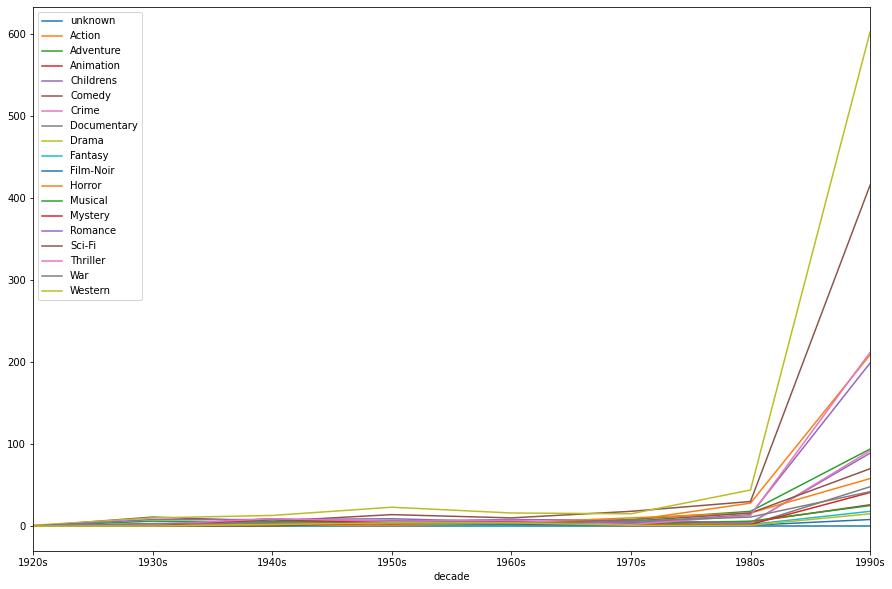

In [65]:
df = item.groupby('decade')[item.columns[3:-2]].sum()
fig = df.plot()
fig = plt.gcf()
fig.set_size_inches(15, 10)


In [68]:
item.groupby('decade')[item.columns[3:-2]].sum()

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
decade,,,,,,,,,,,,,,,,,,,
1920s,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1930s,0,1,2,1,3,11,2,0,10,0,1,1,6,1,8,0,2,3,0
1940s,0,0,4,4,5,6,4,0,13,0,9,1,5,8,8,0,9,3,2
1950s,0,3,5,2,6,14,2,0,23,1,2,1,7,4,9,4,6,3,4
1960s,0,3,4,2,8,10,2,0,16,0,2,4,4,3,5,5,7,3,4
1970s,0,7,8,2,7,18,4,0,15,1,1,10,3,2,4,6,2,6,1
1980s,0,28,18,5,4,30,3,2,44,2,1,16,6,2,14,16,13,11,1
1990s,0,209,94,26,89,416,92,48,603,18,8,58,25,41,199,70,212,42,15


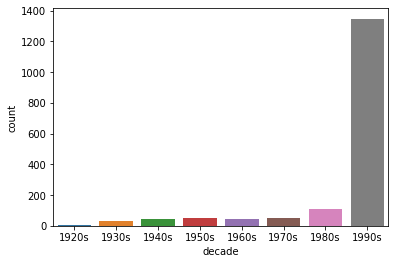

In [69]:
#total genre by decade
sns.countplot(item.decade.sort_values());

### 9. Find the top 25 movies, each having a minimum of 100 ratings - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [70]:
#your answer here
## Applying filter function to get at least 100 ratings 
## Calculating mean for those movies with least rating of 100
## Selecting top 25 movies with highest mean
dfMin100ratings = data.groupby('movie id').filter(lambda x : x.rating.count() >=100).groupby('movie id').mean().sort_values(by = 'rating',ascending=False).head(25)
dfMin100ratings



,user id,rating,timestamp
movie id,,,
408,443.142857,4.491071,8.823304e+08
318,469.714765,4.466443,8.834050e+08
169,454.483051,4.466102,8.828888e+08
483,471.831276,4.456790,8.834745e+08
64,441.187279,4.445230,8.826119e+08
603,468.650718,4.387560,8.837371e+08
12,448.382022,4.385768,8.829016e+08
50,471.384220,4.358491,8.830261e+08
178,453.552000,4.344000,8.828963e+08


In [71]:
## Merging above dataframe with item to get movie titles (based on common column 'movie id')
df_merged = dfMin100ratings.merge(item[['movie id','movie title']],left_on='movie id',right_on='movie id')
df_merged

,movie id,user id,rating,timestamp,movie title
0,408,443.142857,4.491071,8.823304e+08,"Close Shave, A"
1,318,469.714765,4.466443,8.834050e+08,Schindler's List
2,169,454.483051,4.466102,8.828888e+08,"Wrong Trousers, The"
3,483,471.831276,4.456790,8.834745e+08,Casablanca
4,64,441.187279,4.445230,8.826119e+08,"Shawshank Redemption, The"
5,603,468.650718,4.387560,8.837371e+08,Rear Window
6,12,448.382022,4.385768,8.829016e+08,"Usual Suspects, The"
7,50,471.384220,4.358491,8.830261e+08,Star Wars
8,178,453.552000,4.344000,8.828963e+08,12 Angry Men
9,134,466.853535,4.292929,8.833150e+08,Citizen Kane


In [72]:
dfMin100ratings.merge(item[['movie id','movie title']],left_on='movie id',right_on='movie id',how='left')

,movie id,user id,rating,timestamp,movie title
0,408,443.142857,4.491071,8.823304e+08,"Close Shave, A"
1,318,469.714765,4.466443,8.834050e+08,Schindler's List
2,169,454.483051,4.466102,8.828888e+08,"Wrong Trousers, The"
3,483,471.831276,4.456790,8.834745e+08,Casablanca
4,64,441.187279,4.445230,8.826119e+08,"Shawshank Redemption, The"
5,603,468.650718,4.387560,8.837371e+08,Rear Window
6,12,448.382022,4.385768,8.829016e+08,"Usual Suspects, The"
7,50,471.384220,4.358491,8.830261e+08,Star Wars
8,178,453.552000,4.344000,8.828963e+08,12 Angry Men
9,134,466.853535,4.292929,8.833150e+08,Citizen Kane


In [73]:
## top 25 movies with at least 100 ratings with their title and id 
df_merged[['movie title','movie id','rating']]


,movie title,movie id,rating
0,"Close Shave, A",408,4.491071
1,Schindler's List,318,4.466443
2,"Wrong Trousers, The",169,4.466102
3,Casablanca,483,4.456790
4,"Shawshank Redemption, The",64,4.445230
5,Rear Window,603,4.387560
6,"Usual Suspects, The",12,4.385768
7,Star Wars,50,4.358491
8,12 Angry Men,178,4.344000
9,Citizen Kane,134,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [74]:
## for this we need to mege user with item 
## user and item don't have any common column so first have to merge user with data ( based on 'user id') and then with item
## retaining only necessary columns need for this analysis
user_data_merged = user.merge(data,left_on='user id',right_on='user id')[['gender','movie id']]
user_data_merged 

,gender,movie id
0,M,61
1,M,189
2,M,33
3,M,160
4,M,20
...,...,...
99995,M,415
99996,M,219
99997,M,796
99998,M,739


In [75]:
## now merging with item
user_item_merged = user_data_merged .merge(item,left_on='movie id',right_on='movie id')
user_item_merged

,gender,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,decade
0,M,61,Three Colors: White,01-Jan-1994,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1994,1990s
1,M,61,Three Colors: White,01-Jan-1994,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1994,1990s
2,F,61,Three Colors: White,01-Jan-1994,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1994,1990s
3,M,61,Three Colors: White,01-Jan-1994,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1994,1990s
4,M,61,Three Colors: White,01-Jan-1994,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1994,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,M,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1998,1990s
99986,M,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1998,1990s
99987,M,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1998,1990s
99988,M,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1994,1990s


In [76]:
user_item_merged.gender.value_counts()

M    74252
F    25738
Name: gender, dtype: int64

In [77]:
## dropping columns not required for this analysis
df = user_item_merged.drop(columns = ['movie id','movie title', 'release date','year','decade'])
df.head()

,gender,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,M,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,M,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,F,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,M,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,M,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [78]:
df.groupby('gender').sum()

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,,
F,0,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,0,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [79]:
# %age of genre viewership by gender 
df.groupby('gender').sum().apply(lambda x: x/sum(x), axis=1).mul(100).round(2).transpose().rename(columns= {'F':'F%','M':'M%'})
#Questions
# Men watch more drama than women : No as we can see precentage of women watching drama is 20.50 where as its 18.18 for Men
# Women watch more Sci-Fi than men : No as percentage of women watching Sci-Fi is 4.9 where as its 6.36 for men
# Men watch more Romance than women : No Womens% = 10.91, Mens% = 8.56

gender,F%,M%
unknown,0.00,0.00
Action,10.13,12.68
Adventure,5.85,6.68
Animation,1.85,1.64
Childrens,4.16,3.12
Comedy,15.02,13.70
Crime,3.34,3.94
Documentary,0.35,0.36
Drama,20.50,18.18
Fantasy,0.68,0.62


# Conculsion :
    data frames data, time and user has below shape:
	data-->100000 rows and 4 columns
	Item -->1681 rows and 22 columns
	user-->943 rows and 5 columns 

There is no null value in all the three data sets 

There are 65 movies with more than 1 genre 

There is only one movie where is genre is unknow ( later dropped in the dataset(item))

Mean of ‘rating’(3.5) is greater than ‘Median’(4)hence it indicates left-skewed data 

Users Age follow the Mean is greater than Median hence its a rightly skewed dataset ( which is reflected in the histogram as well)

‘Year’ is too much skewed towards left as the most numbers of movies are after the 1990s

Observing the user’s occupation count plot one can see there are substantially hight number of ‘Student’, followed by ‘other’ and ‘educator’

There are a high number of ‘Males’ compared to ‘Females’ as indicated by countplot of Gender column

By observing heatmap for the year vs genres it can be deduced that there are hight number of Drama Comedy movies in the ’90s, it also shows an increase in ‘Action’, ‘Romance’ and ‘Thriller’ during 90s

For the top 25 movies with at least 100 rating movie titled ‘ A closed Shave’ has the highest mean rating (4.49)

percentage of women watching drama is 20.50 whereas its 18.18 for Men
A percentage of women watching Sci-Fi is 4.9 whereas it’s 6.36 for men
 Men watch more Romance than women : No Womens% = 10.91, Mens% = 8.56
‘Drama’ is the most popular genre among both Men and Women with 20.5% of Women and 18.18% of Men followed by Comedy with 15.02% of women and 13.70% of Men
